### Result of time complexity

In [1]:
import os

import pandas as pd

In [2]:
result_dir = './ibmq_result/time_complexity'


df = pd.DataFrame([])

df = pd.concat([df, pd.read_csv(os.path.join(result_dir, 'ibm_nazca_Q100.csv'))])
df = pd.concat([df, pd.read_csv(os.path.join(result_dir, 'ibm_strasbourg_Q100.csv'))])

df

,n_Q,n_I,n_R,n_L,job_id,job_runtime,backend,rnd_seed
0,100,1,0,0,ctqrgj24gjh0008ptpc0,1.579579,ibm_nazca,0
1,100,1,0,0,ctqrgw3x7b5g0080ta50,1.641544,ibm_nazca,1
2,100,1,0,0,ctqrh5w6g3rg0087q55g,1.563282,ibm_nazca,2
3,100,1,0,0,ctqrhhp6g3rg0087q57g,1.427880,ibm_nazca,3
4,100,1,0,0,ctqrhvf6g3rg0087q5ag,1.558369,ibm_nazca,4
...,...,...,...,...,...,...,...,...
85,100,3,10,10,cts0agabj6wg008d85fg,132.604327,ibm_strasbourg,5
86,100,3,10,10,cts0k1w5cmg0008byxb0,136.944200,ibm_strasbourg,6
87,100,3,10,10,cts0ybh3tvw0008f8q70,129.450288,ibm_strasbourg,7
88,100,3,10,10,cts17hyjzang008f00y0,136.417177,ibm_strasbourg,8


In [3]:
df_mean = df.groupby(['backend', 'n_I', 'n_L', 'n_R'])['job_runtime'].mean()

print(f"backend options: {df['backend'].unique()}")
print(f"n_I options: {df['n_I'].unique()}")
print(f"n_L options: {df['n_L'].unique()}")
print(f"n_R options: {df['n_R'].unique()}")

df_mean

backend options: ['ibm_nazca' 'ibm_strasbourg']
n_I options: [1 2 3]
n_L options: [ 0 10]
n_R options: [ 0 10]


backend         n_I  n_L  n_R
ibm_nazca       1    0    0        1.576993
                          10      27.246987
                     10   10      48.169894
                2    0    0        1.537529
                          10      55.062402
                     10   10      74.776624
                3    0    0        2.566912
                          10     108.074884
                     10   10     130.005670
ibm_strasbourg  1    0    0        1.757308
                          10      27.710539
                     10   10      49.371662
                2    0    0        1.256593
                          10      55.411944
                     10   10      75.126424
                3    0    0        1.384036
                          10     112.234482
                     10   10     133.338599
Name: job_runtime, dtype: float64

In [4]:
def ibmq_gate_time(backend: str):
    # Order of df.groupby indices: 'backend', 'n_I', 'n_L', 'n_R'

    print(f"{'-' * 30} {backend} {'-' * 30}\n")

    for n_I in [1, 2, 3]:
        max_n_R = 10
        max_n_L = 10
        t_prep = df_mean[backend][n_I][0][0]
        t_enc = (df_mean[backend][n_I][0][max_n_R] - df_mean[backend][n_I][0][0]) / max_n_R / (2 ** n_I)
        t_vqc = (df_mean[backend][n_I][max_n_L][max_n_R] - df_mean[backend][n_I][0][max_n_R]) / max_n_L / max_n_R
        print(f"* n_I = {n_I}: t_enc = {t_enc:6.3f} per particle | t_vqc = {t_vqc:.3f} per strongly entangling layer")

        for n_L, n_R in [(0, 0), (0, 10), (10, 10)]:
            t_total = df_mean[backend][n_I][n_L][n_R]
            t_gate = t_total - t_prep
            print(f"- (n_L, n_R) = ({n_L:2d}, {n_R:2d}): t_prep = {t_prep:.3f} | t_gate = {t_gate:6.3f} | t_total = {t_total:6.3f}")

        print()

ibmq_gate_time(backend='ibm_nazca')
ibmq_gate_time(backend='ibm_strasbourg')

------------------------------ ibm_nazca ------------------------------

* n_I = 1: t_enc =  1.283 per particle | t_vqc = 0.209 per strongly entangling layer
- (n_L, n_R) = ( 0,  0): t_prep = 1.577 | t_gate =  0.000 | t_total =  1.577
- (n_L, n_R) = ( 0, 10): t_prep = 1.577 | t_gate = 25.670 | t_total = 27.247
- (n_L, n_R) = (10, 10): t_prep = 1.577 | t_gate = 46.593 | t_total = 48.170

* n_I = 2: t_enc =  1.338 per particle | t_vqc = 0.197 per strongly entangling layer
- (n_L, n_R) = ( 0,  0): t_prep = 1.538 | t_gate =  0.000 | t_total =  1.538
- (n_L, n_R) = ( 0, 10): t_prep = 1.538 | t_gate = 53.525 | t_total = 55.062
- (n_L, n_R) = (10, 10): t_prep = 1.538 | t_gate = 73.239 | t_total = 74.777

* n_I = 3: t_enc =  1.319 per particle | t_vqc = 0.219 per strongly entangling layer
- (n_L, n_R) = ( 0,  0): t_prep = 2.567 | t_gate =  0.000 | t_total =  2.567
- (n_L, n_R) = ( 0, 10): t_prep = 2.567 | t_gate = 105.508 | t_total = 108.075
- (n_L, n_R) = (10, 10): t_prep = 2.567 | t_gate = 1

### Result of pretrained model and noise estimation

In [7]:
from itertools import product
import os

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import pandas as pd
import seaborn as sns

sns.set_theme()

font_path = '/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman.ttf'  # Replace with the actual path
font_properties = FontProperties(fname=font_path, size=12)

In [8]:
backend = 'ibm_brussels'
noise_prob_list = [0, 1E-5, 1E-4, 1E-3, 1E-2]
x_tick_list = ['0', r"$10^{-5}$", r"$10^{-4}$", r"$10^{-3}$", r"$10^{-2}$", 'IBMQ']

df = pd.DataFrame([])

for n_Q, rnd_seed in product([3, 6], range(5)):
    # IBMQ result
    _df = pd.read_csv(os.path.join('ibmq_result', 'pretrained', f"IBMQ-{backend}-Q{n_Q}-{rnd_seed}", 'version_0', 'metrics.csv'))
    _df = _df.assign(noise_prob='IBMQ', rnd_seed=rnd_seed, n_Q=int(n_Q))
    df = pd.concat([df, _df])

    # Noisy quantum circuit simulation
    for i, noise_prob in enumerate(noise_prob_list):
        _df = pd.read_csv(os.path.join('ibmq_result', 'noise', f"Noise_{noise_prob:.0e}-Q{n_Q}-{rnd_seed}", 'version_0', 'metrics.csv'))
        _df = _df.assign(noise_prob=x_tick_list[i], rnd_seed=rnd_seed, n_Q=int(n_Q))
        df = pd.concat([df, _df])

df.head(5)

,epoch,step,test_accuracy,test_auc,noise_prob,rnd_seed,n_Q
0,0,0,0.4975,0.497963,IBMQ,0,3
0,0,0,0.7375,0.812500,0,0,3
0,0,0,0.7050,0.779600,$10^{-5}$,0,3
0,0,0,0.7225,0.801175,$10^{-4}$,0,3
0,0,0,0.7050,0.781975,$10^{-3}$,0,3


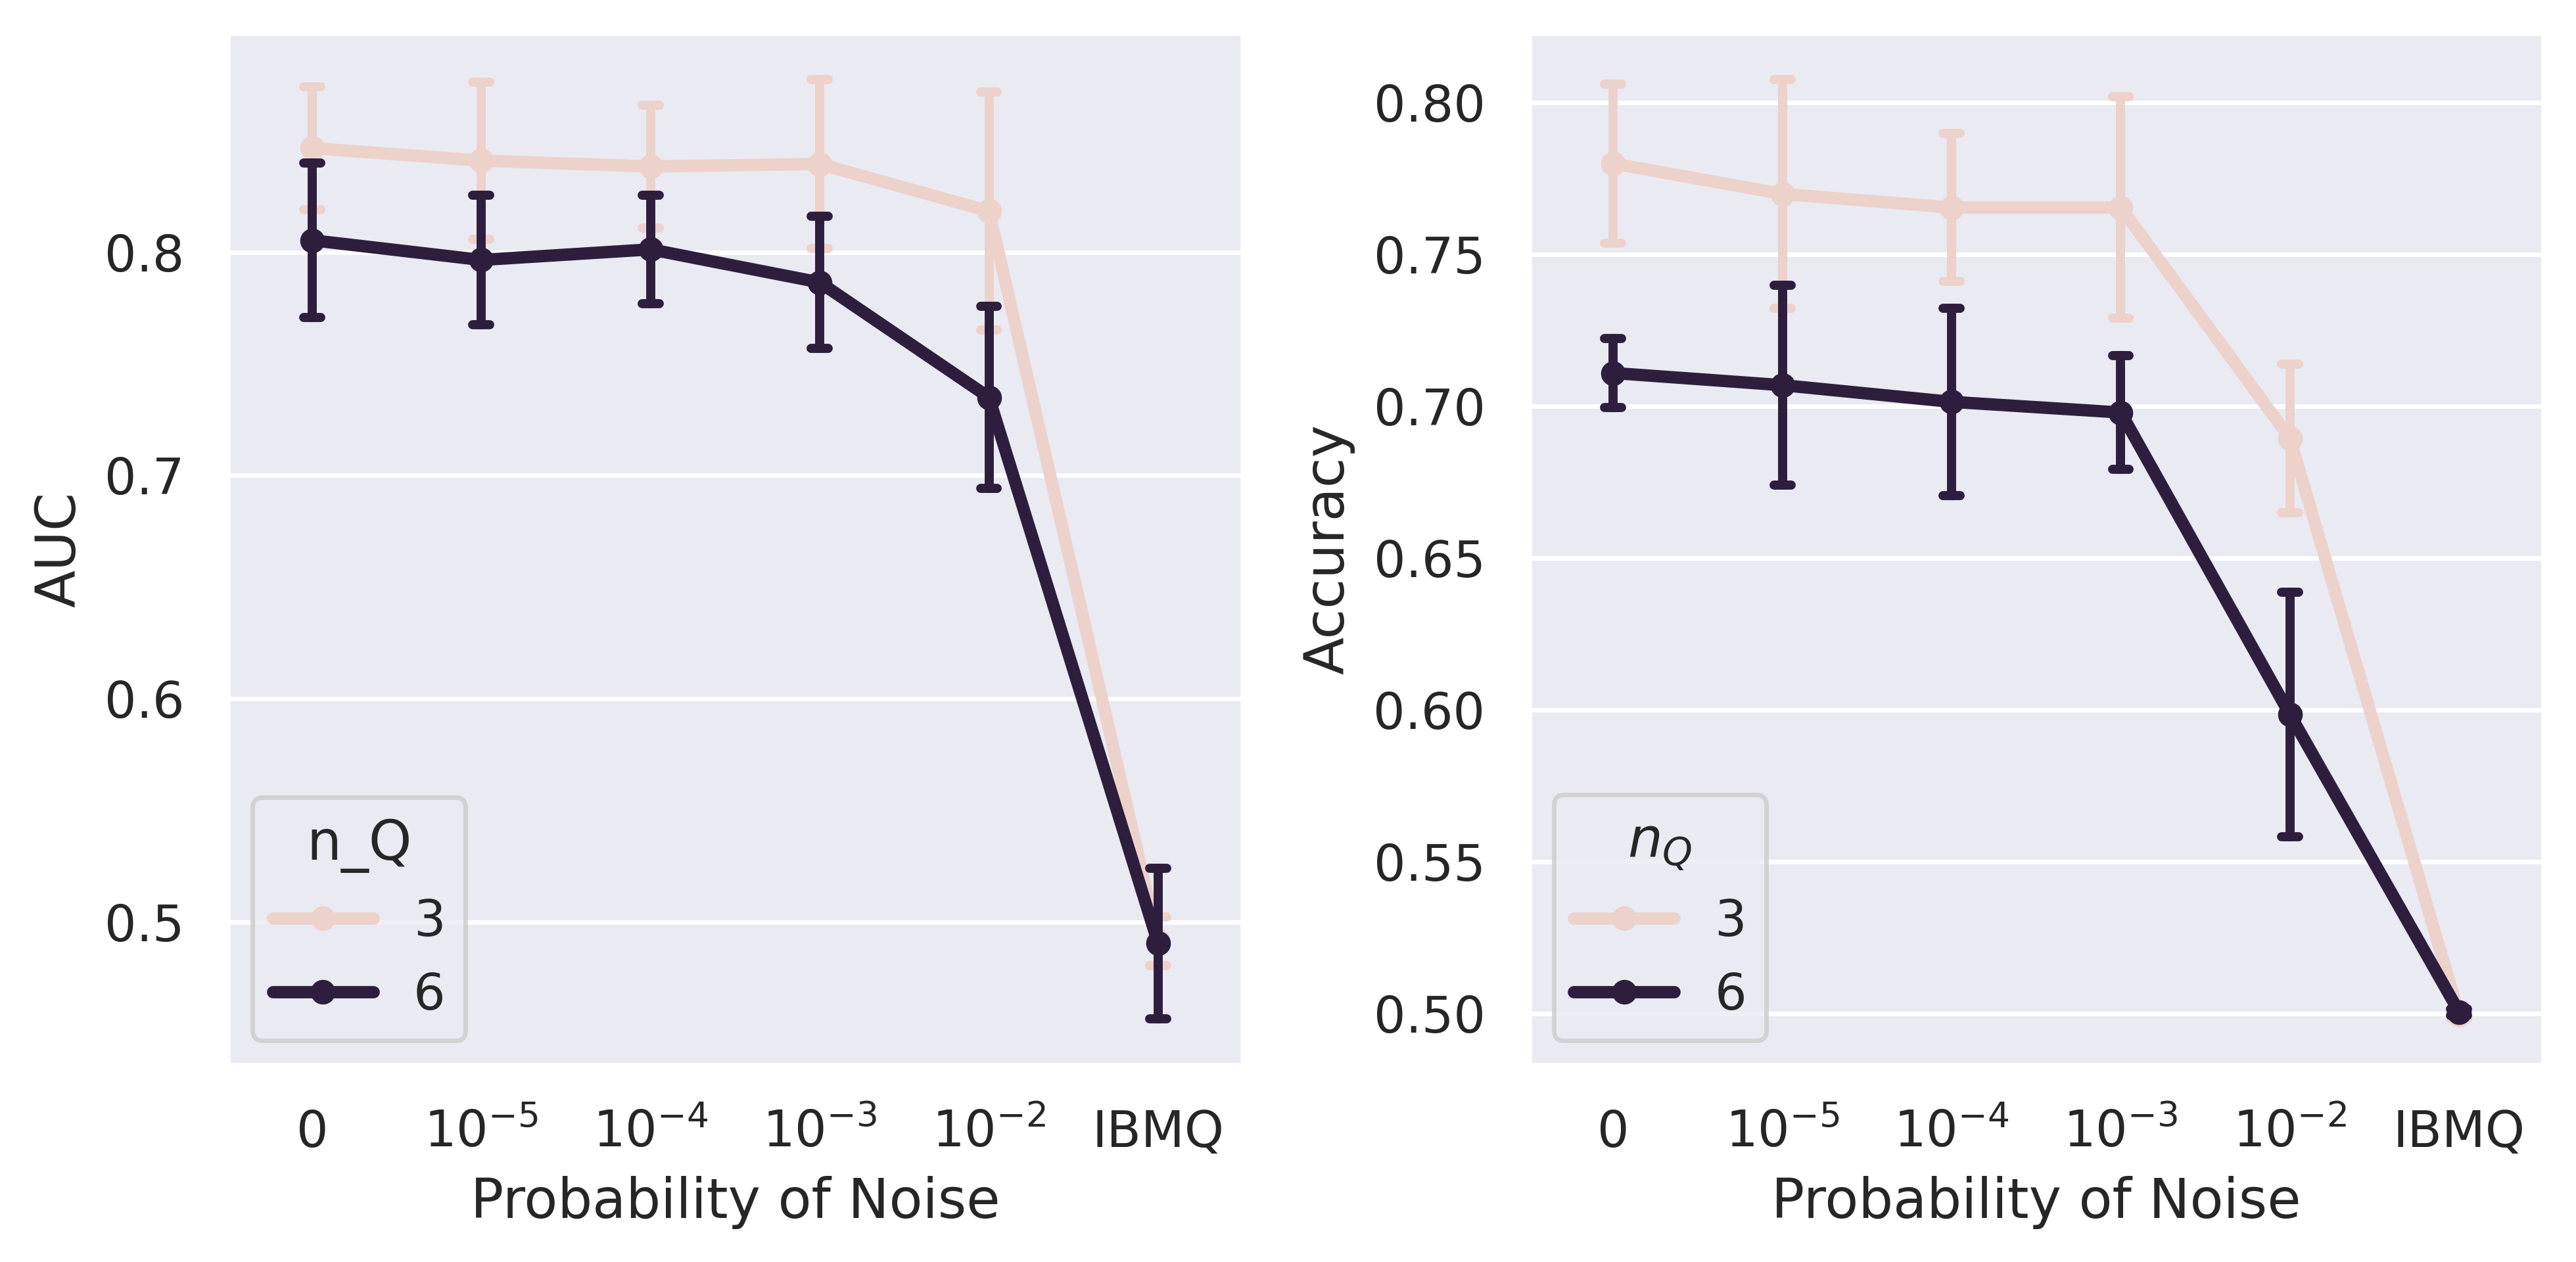

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4), dpi=500)
# fig.suptitle(r"Noise Extrapolation of 4-Particle Top-QCD Jets ($n_I=2$) on Pre-trained QCGNN", fontsize=12)

def plot_noise_extrapolation(ax: plt.Axes, metric: str, y_label: str):
    sns.pointplot(
        data=df, x='noise_prob', y=metric, ax=ax, order=x_tick_list, hue='n_Q',
        marker='.', err_kws={'linewidth': 2}, capsize=0.1, errorbar=('sd', 1),
    )

    ax.set_xlabel('Probability of Noise')
    ax.set_ylabel(y_label)

plot_noise_extrapolation(ax[0], 'test_auc', 'AUC')
plot_noise_extrapolation(ax[1], 'test_accuracy', 'Accuracy')

plt.legend(title=r"$n_Q$", loc='lower left')
plt.tight_layout()